<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-исследования" data-toc-modified-id="Подготовка-данных-для-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных для исследования</a></span><ul class="toc-item"><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка выбросов</a></span></li></ul></li><li><span><a href="#Исследование-модели" data-toc-modified-id="Исследование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-рисков-и-прибыли" data-toc-modified-id="Расчёт-рисков-и-прибыли-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт рисков и прибыли</a></span></li><li><span><a href="#Итоги-проекта" data-toc-modified-id="Итоги-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги проекта</a></span></li></ul></div>

# Выбор локации для скважины

Результат исследования позволит компании, на основе предоставленных проб нефти в трёх регионах (характеристики для каждой скважины (качество нефти и объём её запасов) в каждом регионе), определить регион, где добыча принесёт наибольшую прибыль.


**Цель исследования**
  1. Необходимо построить модель машинного обучения, для задачи регрессии, которая спрогнозирует регион, где добыча принесёт наибольшую прибыль.
  2. Требуется проанализировать возможную прибыль и риски техникой Bootstrap.
  3. Необходимо, после оценки рисков, оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.


**Исследование пройдёт в шесть этапов:**
 1. Обзор данных;
 2. Предобработка данных;
 3. Подготовка данных для исследования;
 4. Исследование модели;
 5. Подготовка к расчёту прибыли;
 6. Рассчёт рисков и прибыли.

## Обзор данных

Составим первое представление о данных.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файлов в датафреймы и сохраним в переменные: `geo_data_first_region`, `geo_data_second_region` и `geo_data_third_region`.**

In [ ]:
# обновим библиотеку 'scikit-learn' до последней версии
!pip install --upgrade scikit-learn

# обновим библиотеку 'pandas' до последней версии
!pip install --upgrade pandas

# обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade matplotlib

# обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade seaborn

In [1]:
# импорт библиотеки 'os'
import os

# импорт библиотеки 'concurrent' модуль 'future'
import concurrent.futures

# импорт библиотеки 'pandas'
import pandas as pd

# импорт библиотеки 'numpy'
import numpy as np

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns

# импорт библиотеки для модели "линейной регрессии"
from sklearn.linear_model import LinearRegression

# импорт библиотеки для оценки качества модели
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error,
                             r2_score,
                             mean_absolute_percentage_error)

# импорт библиотеки для кросс-валидации
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# импорт библиотеки для масштабирования признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# импорт библиотеки для нахождения доверительного интервала
from scipy import stats as st

# импорт библиотеки для bootstrap
from numpy.random import RandomState

     |████████████████████████████████| 9.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 65.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 12.4 MB 23.8 MB/s eta 0:00:01   |▋                               | 245 kB 1.2 MB/s eta 0:00:11
     |████████████████████████████████| 341 kB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 41.4 MB/s eta 0:00:01
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 

In [2]:
try:
    # читаем данные из csv-файлов и сохраняем их в виде датафреймов в 'geo_data_first_region',
    # 'geo_data_second_region' и 'geo_data_third_region'
    geo_data_first_region = pd.read_csv('***')
    geo_data_second_region = pd.read_csv('***')
    geo_data_third_region = pd.read_csv('***')
    
except:
    # в случае отсутствия csv-файлов в локальном месторасположении, читаем их из облачного хранилища
    # и сохраняем данные в виде датафреймов в 'geo_data_first_region', 
    # 'geo_data_second_region' и 'geo_data_third_region'
    geo_data_first_region = pd.read_csv('***')
    geo_data_second_region = pd.read_csv('***')
    geo_data_third_region = pd.read_csv('***')

**2. Выведем первые пять строчек датафреймов: `geo_data_first_region`, `geo_data_second_region` и `geo_data_third_region` на экран.**

In [3]:
# посмотрим первых пять строк датафрейма 'geo_data_first_region'
geo_data_first_region.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# посмотрим первых пять строк датафрейма 'geo_data_second_region'
geo_data_second_region.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
# посмотрим первых пять строк датафрейма 'geo_data_third_region'
geo_data_third_region.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**3. Выведем основную информацию о датафреймах с помощью метода `info()`.**

In [6]:
# получение общей информации о данных в датафрейме 'geo_data_first_region'
geo_data_first_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице четыре столбца. Типы данных в столбцах — `float64` и `object`.

* `id` — уникальный идентификатор скважины;
* `f0` - значимый признак;
* `f1` - значимый признак;
* `f2` - значимый признак;
* `product` — объём запасов в скважине (тыс. баррелей).

Количество значений в столбце одинаковое и соответствует общему количеству записей в таблице. Значит в данных отсутствуют пропуски. В названиях всех колонок (столбцов) таблицы, отсутствуют нарушения стиля.

In [7]:
# получение общей информации о данных в датафрейме 'geo_data_second_region'
geo_data_second_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице четыре столбца. Типы данных в столбцах — `float64` и `object`.

* `id` — уникальный идентификатор скважины;
* `f0` - значимый признак;
* `f1` - значимый признак;
* `f2` - значимый признак;
* `product` — объём запасов в скважине (тыс. баррелей).

Количество значений в столбце одинаковое и соответствует общему количеству записей в таблице. Значит в данных отсутствуют пропуски. В названиях всех колонок (столбцов) таблицы, отсутствуют нарушения стиля.

In [8]:
# получение общей информации о данных в датафрейме 'geo_data_third_region'
geo_data_third_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице четыре столбца. Типы данных в столбцах — `float64` и `object`.

* `id` — уникальный идентификатор скважины;
* `f0` - значимый признак;
* `f1` - значимый признак;
* `f2` - значимый признак;
* `product` — объём запасов в скважине (тыс. баррелей).

Количество значений в столбце одинаковое и соответствует общему количеству записей в таблице. Значит в данных отсутствуют пропуски. В названиях всех колонок (столбцов) таблицы, отсутствуют нарушения стиля.

**4. Построим общую гистограмму для всех числовых столбцов таблицы в каждом датафрейме.** <a id='step_4'></a>

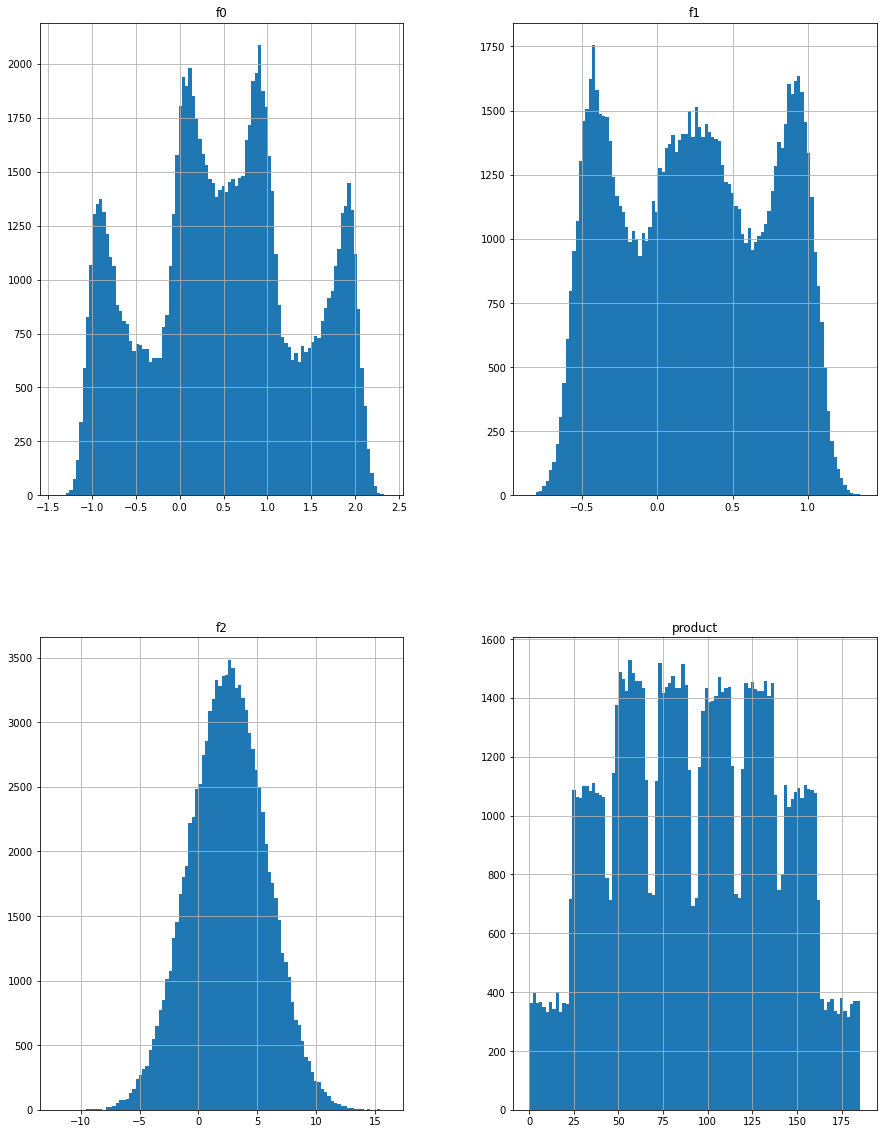

In [9]:
# с помощью функции 'hist' построим общую гистограмму для 'geo_data_first_region'
geo_data_first_region.hist(bins= 100, figsize=(15, 20));

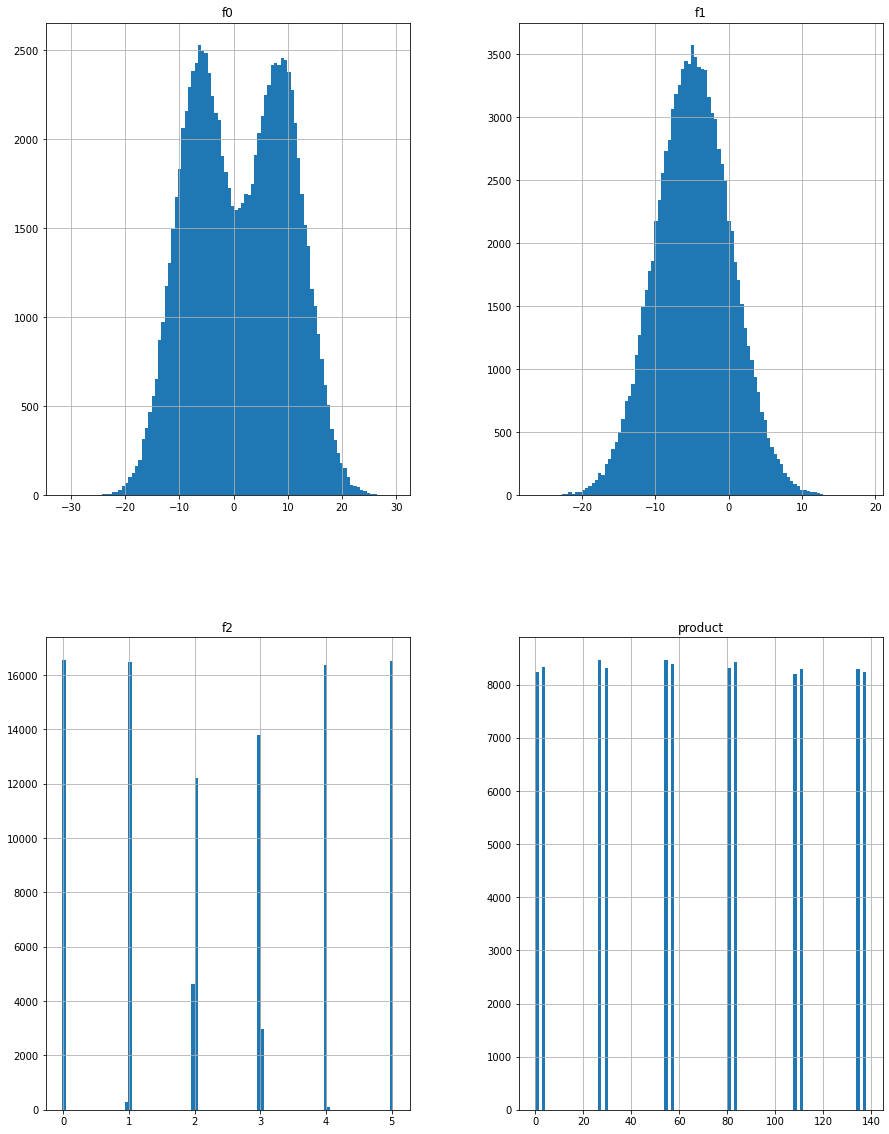

In [10]:
# с помощью функции 'hist' построим общую гистограмму для 'geo_data_second_region'
geo_data_second_region.hist(bins= 100, figsize=(15, 20));

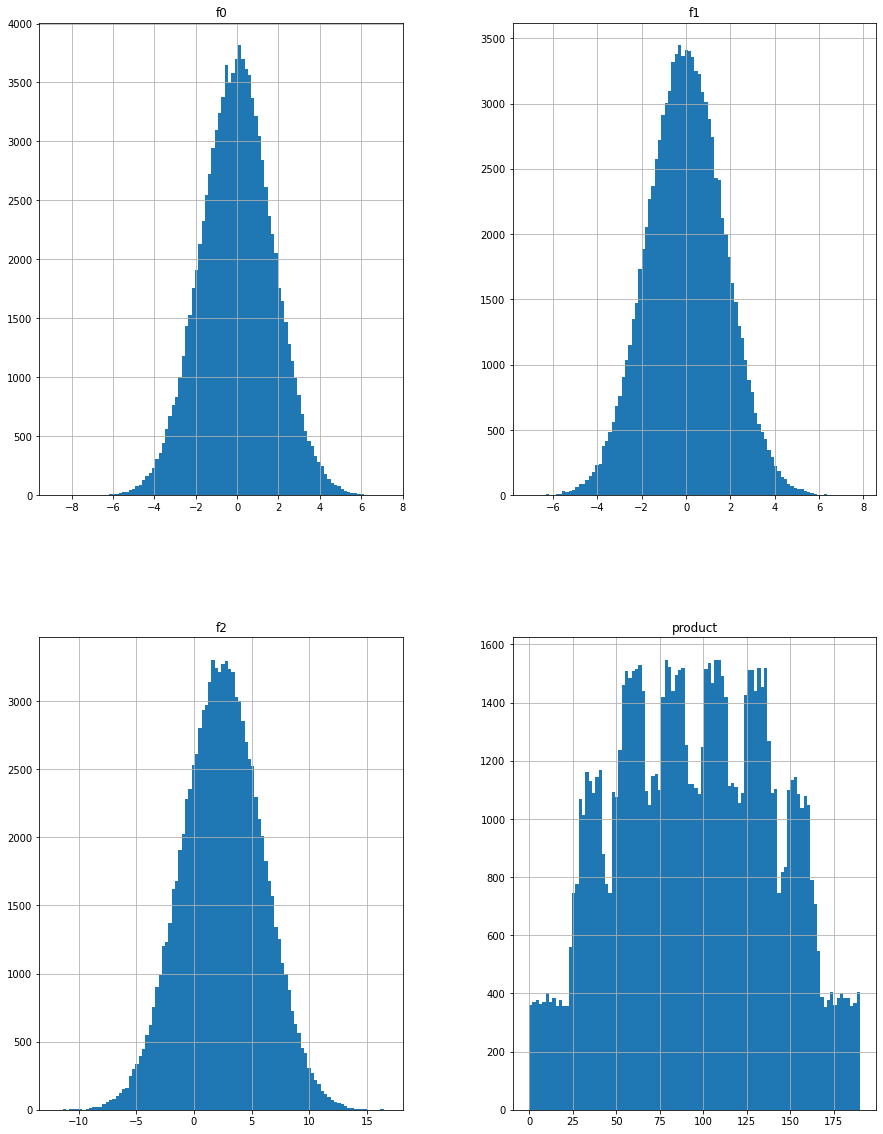

In [11]:
# с помощью функции 'hist' построим общую гистограмму для 'geo_data_third_region'
geo_data_third_region.hist(bins= 100, figsize=(15, 20));

**5. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в каждом датафрейме.**

In [12]:
# выведем статистическую информацию для 'geo_data_first_region'
geo_data_first_region.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
# выведем статистическую информацию для 'geo_data_second_region'
geo_data_second_region.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
# выведем статистическую информацию для 'geo_data_third_region'
geo_data_third_region.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**6. Создадим глобальные переменные для хранения размеров исходных датасетов.**

In [15]:
geo_data_first_region_source_size = geo_data_first_region.shape[0]

In [16]:
geo_data_second_region_source_size = geo_data_second_region.shape[0]

In [17]:
geo_data_third_region_source_size = geo_data_third_region.shape[0]

**Выводы**

Предварительно можно утверждать, что данных достаточно для исследования. Отсутствуют пропуски. Возможно, есть аномальные значения (артефакты) и дубликаты (явные/неявные) в данных. Столбцы содержат подходящие типы данных. В названиях всех колонок (столбцов) таблицы, отсутствуют нарушения стиля.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных


Проверим данные на артефакты (аномалии), дубликаты (явные/неявные) и, при нахождении, исправим.

### Обработка дубликатов

**7. Обработаем дубликаты в столбце `id`.**

Стобец `id` - уникальный идентификатор скважины. Следовательно, несколько строк с одним `id` не могут находиться в датафрейме. Для устранения шума из данных, при нахождении, все строки дубликаты по столбцу `id` будут удалены.

In [18]:
# проверяем количество строк дубликатов в 'geo_data_first_region'
geo_data_first_region.duplicated().sum()

0

In [19]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_first_region'
geo_data_first_region['id'].duplicated().sum()

10

In [20]:
# удалим строки дубликаты по столбцу 'id', в 'geo_data_first_region'
geo_data_first_region = geo_data_first_region.drop_duplicates(subset=['id'])

In [21]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_first_region'
geo_data_first_region['id'].duplicated().sum()

0

In [22]:
# проверяем количество строк дубликатов в 'geo_data_first_region'
geo_data_first_region.duplicated().sum()

0

In [23]:
# проверяем количество строк дубликатов в 'geo_data_second_region'
geo_data_second_region.duplicated().sum()

0

In [24]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_second_region'
geo_data_second_region['id'].duplicated().sum()

4

In [25]:
# удалим строки дубликаты по столбцу 'id', в 'geo_data_second_region'
geo_data_second_region = geo_data_second_region.drop_duplicates(subset=['id'])

In [26]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_second_region'
geo_data_second_region['id'].duplicated().sum()

0

In [27]:
# проверяем количество строк дубликатов в 'geo_data_second_region'
geo_data_second_region.duplicated().sum()

0

In [28]:
# проверяем количество строк дубликатов в 'geo_data_third_region'
geo_data_third_region.duplicated().sum()

0

In [29]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_third_region'
geo_data_third_region['id'].duplicated().sum()

4

In [30]:
# удалим строки дубликаты по столбцу 'id', в 'geo_data_third_region'
geo_data_third_region = geo_data_third_region.drop_duplicates(subset=['id'])

In [31]:
# проверяем количество строк дубликатов cтолбца 'id', в 'geo_data_third_region'
geo_data_third_region['id'].duplicated().sum()

0

In [32]:
# проверяем количество строк дубликатов в 'geo_data_third_region'
geo_data_third_region.duplicated().sum()

0

**8. Проверим какая доля исходных датасетов осталась после фильтрации.**

In [33]:
# рассчитаем размер доли исходного датасета 'geo_data_first_region', которая осталась после фильтрации,
# в процентах
(geo_data_first_region.shape[0] / geo_data_first_region_source_size) * 100

99.99

In [34]:
# рассчитаем размер доли исходного датасета 'geo_data_second_region', которая осталась после фильтрации,
# в процентах
(geo_data_second_region.shape[0] / geo_data_second_region_source_size) * 100

99.996

In [35]:
# рассчитаем размер доли исходного датасета 'geo_data_third_region', которая осталась после фильтрации,
# в процентах
(geo_data_third_region.shape[0] / geo_data_third_region_source_size) * 100

99.996

**Выводы**

Предобработка обнаружила следующие проблемы в данных:

- дубликаты.

Удалили дубликаты из трех датафреймов.

Размер доли исходных датасетов, которая осталась после фильтрации: 

* `geo_data_first_region` - **`99.99%`**;
* `geo_data_second_region` - **`99.996%`**;
* `geo_data_third_region` - **`99.996%`**.

После такой предобработки данных, исследование станет более точным.

Теперь можно перейти к подготовке данных для исследования.

## Подготовка данных для исследования

Изучим исходное множество признаков, для каждого датафрейма, которые будут использованы для обучения модели, на: мультиколлинеарность признаков (высокая степень коррелированности признаков), их избыточное количество, содержание их значений (категориальные признаки, количественные признаки с разными разбросами значений). Проверим  на наличие выбросов.


1. Столбец `id` - уникальный идентификатор скважины, строкового типа данных, не несёт полезной дополнительной информации для обучения модели, а является лишь дополнительным индексом к существующему. Так как, исходный датафрейм уже содержит встроенную индексацию данных. Следовательно, он является избыточным.

*Вышеуказанный признак необходимо удалить из исходного множества признаков.*

2. Столбцы: `f0`, `f1` и `f2`, являются численными признаками, но имеют разный разброс значений. При обучении модели, алгорим может решить, что признаки с большими значениями и разбросом важнее. Для избежания данной ловушки, необходимо масштабировать данные признаки с помощью метода - стандартизации данных.

**9. Создадим новые датафреймы для обучения модели (ml - machine learning), посредством удаления избыточных признаков из множества признаков, в каждом датафрейме.**

In [36]:
geo_data_first_region_ml = geo_data_first_region.drop(['id'], axis=1)

In [37]:
geo_data_second_region_ml = geo_data_second_region.drop(['id'], axis=1)

In [38]:
geo_data_third_region_ml = geo_data_third_region.drop(['id'], axis=1)

In [39]:
geo_data_first_region_ml.shape

(99990, 4)

In [40]:
geo_data_second_region_ml.shape

(99996, 4)

In [41]:
geo_data_third_region_ml.shape

(99996, 4)

**10. Проверим предобработанные признаки каждого датафрейма, на корреляцию между другими признаками.**

Проверим предобработанные признаки каждого датафрейма, на мультиколлинеарность (корреляцию между признаками), на корреляцию между каждым признаком и целевой переменной.

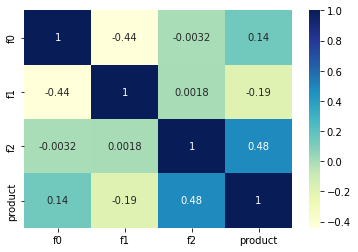

In [42]:
sns.heatmap(geo_data_first_region_ml.corr(method='spearman'), annot=True, cmap='YlGnBu');

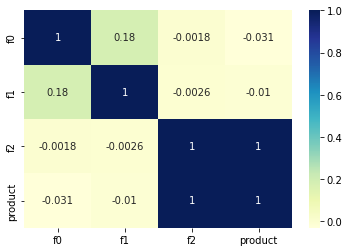

In [43]:
sns.heatmap(geo_data_second_region_ml.corr(method='spearman'), annot=True, cmap='YlGnBu');

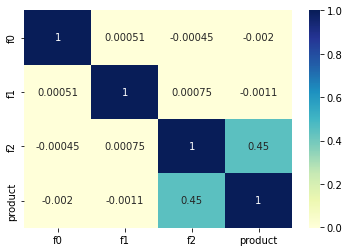

In [44]:
sns.heatmap(geo_data_third_region_ml.corr(method='spearman'), annot=True, cmap='YlGnBu');

Какая-либо существенная корреляция в признаках, в предобработаном множестве признаков датафреймов(`geo_data_first_region_ml`, `geo_data_second_region_ml`, `geo_data_third_region_ml`), которая может повлиять на обучение нашей модели, отсутствует (мультиколлинеарность отсутствует).

### Обработка выбросов

Проверим столбцы в каждом новом датафрейме, которые созданы для обучения ml модели, на выбросы и, при наличии, удалим их.** 

Проверяем на основании результатов, полученных на [четвертом шаге](#step_4) нашего исследования.

In [45]:
# функция обработки выбросов в одном признаке
def outlier_handling_in_feature(dataframe,
                                column_name,
                                min_range_limit,
                                max_range_limit,
                                bins=300):
    
    # построим диаграмму размаха признака
    dataframe[column_name].plot(kind='box', title=column_name, grid=True);
    plt.show()
    
    # построим гистограмму признака 
    dataframe[column_name].plot(kind='hist', title=column_name, bins=bins);
    plt.show()
    
    # удалим из датасета выбросы 'dataframe', из столбца 'column_name', выбросы
    dataframe = dataframe[~(dataframe[column_name] < min_range_limit) &
                          ~(dataframe[column_name] > max_range_limit)]
    
    # проверяем наличие выбросов после обработки
    dataframe[column_name].plot(kind='box', title=column_name, grid=True);
    plt.show()
    
    # построим, повторно, гистограмму признака
    dataframe[column_name].plot(kind='hist', title=column_name, bins=bins);
    plt.show()
    
    return dataframe

In [46]:
# функция вычисления левой и правой границы (левое и правое "крайние" значения данных) [на диаграмме размаха]
# параметр 'feature' - признак (столбец из датафрейма)
def left_right_extreme_data_boundary(feature):
    
    # вычислим квантили q3 (75%-й) и q1 (25% -й)
    q3, q1 = np.percentile(feature, [75,25])

    # вычислим межквантильный интервал iqr
    iqr = q3 - q1

    # рассчитаем левую и правую границу (левое и правое "крайние" значения данных)
    return np.around((q1 - iqr * 1.5) + 0.1, decimals=3), np.around((q3 + iqr * 1.5) - 0.12, decimals=3)

**11. Проверим датафрейм `geo_data_first_region_ml`.**

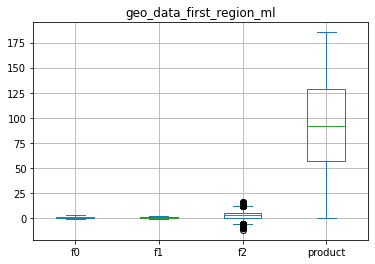

In [47]:
# построим диаграмму размаха для датафрейма 'geo_data_first_region_ml'
geo_data_first_region_ml.plot(kind='box', title='geo_data_first_region_ml', grid=True);

В признаке (столбце) `f2`, есть выбросы, которые требуется обработать.

**12. Обработаем признак `f2` в датафрейме `geo_data_first_region_ml`.**

In [48]:
# вычислим границы данных
left_border, right_border = left_right_extreme_data_boundary(geo_data_first_region_ml['f2'])

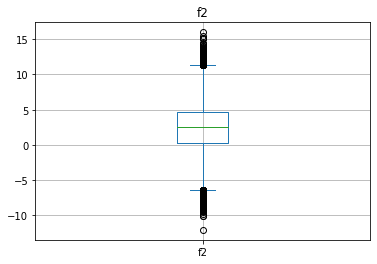

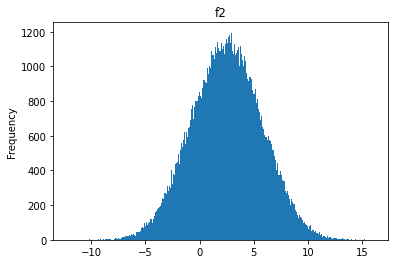

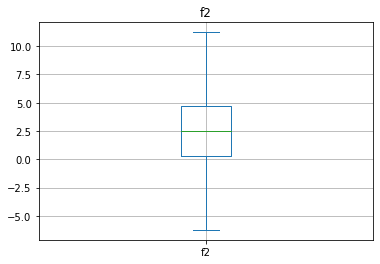

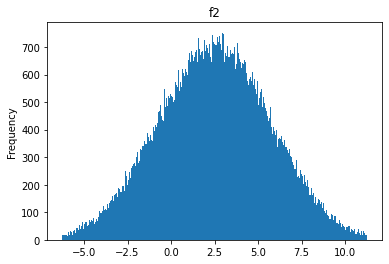

In [49]:
geo_data_first_region_ml = outlier_handling_in_feature(dataframe=geo_data_first_region_ml, 
                                                       column_name='f2',
                                                       min_range_limit=left_border,
                                                       max_range_limit=right_border)

**13. Проверим датафрейм `geo_data_second_region_ml`.**

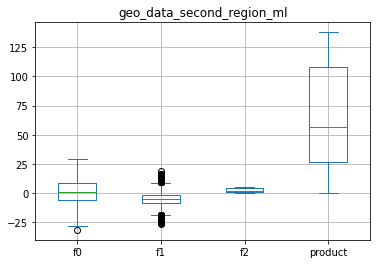

In [50]:
# построим диаграмму размаха для датафрейма 'geo_data_second_region_ml'
geo_data_second_region_ml.plot(kind='box', title='geo_data_second_region_ml', grid=True);

В признаке (столбце) `f1`, есть выбросы, которые требуется обработать.

**14. Обработаем признак `f1` в датафрейме `geo_data_second_region_ml`.**

In [51]:
# вычислим границы данных
left_border, right_border = left_right_extreme_data_boundary(geo_data_second_region_ml['f1'])

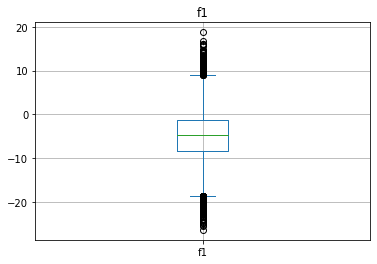

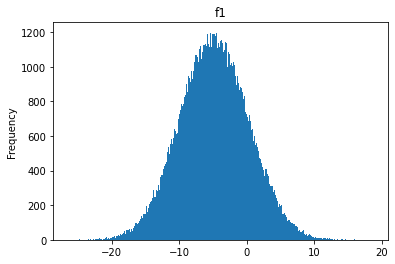

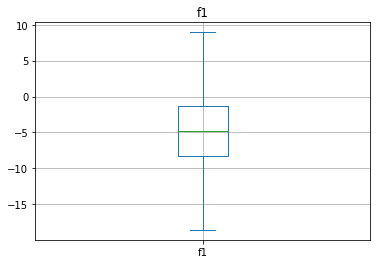

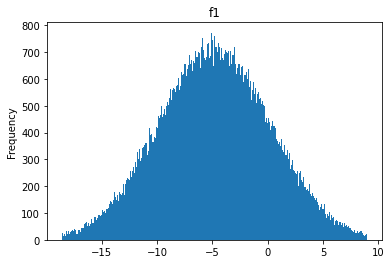

In [52]:
geo_data_second_region_ml = outlier_handling_in_feature(dataframe=geo_data_second_region_ml, 
                                                        column_name='f1',
                                                        min_range_limit=left_border,
                                                        max_range_limit=right_border)

**15. Проверим датафрейм `geo_data_third_region_ml`.**

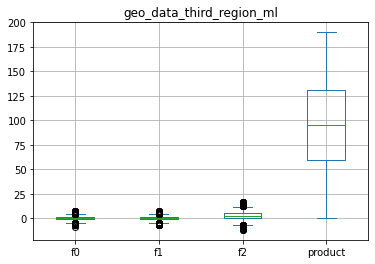

In [53]:
# построим диаграмму размаха для датафрейма 'geo_data_third_region_ml'
geo_data_third_region_ml.plot(kind='box', title='geo_data_third_region_ml', grid=True);

В признаках (столбцах) `f0`, `f1` и `f2`,  есть выбросы, которые требуется обработать.

**16. Обработаем признак `f0` в датафрейме `geo_data_third_region_ml`.**

In [54]:
# вычислим границы данных
left_border, right_border = left_right_extreme_data_boundary(geo_data_third_region_ml['f0'])

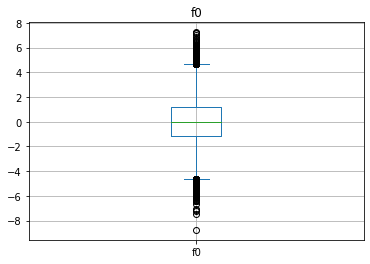

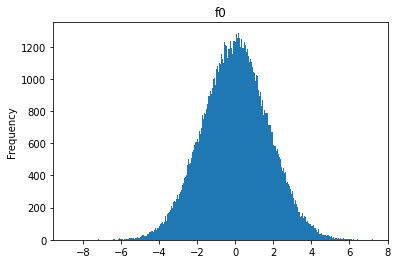

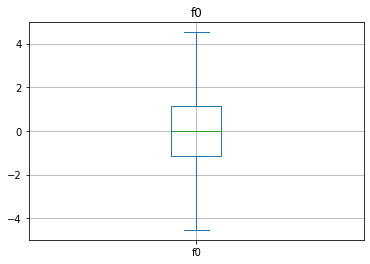

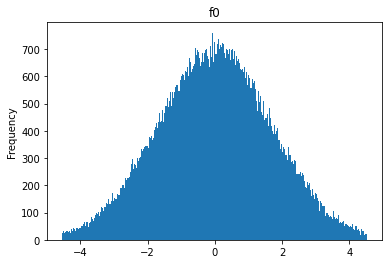

In [55]:
geo_data_third_region_ml = outlier_handling_in_feature(dataframe=geo_data_third_region_ml, 
                                                       column_name="f0",
                                                       min_range_limit=left_border,
                                                       max_range_limit=right_border)

**17. Обработаем признак `f1` в датафрейме `geo_data_third_region_ml`.**

In [56]:
# вычислим границы данных
left_border, right_border = left_right_extreme_data_boundary(geo_data_third_region_ml['f1'])

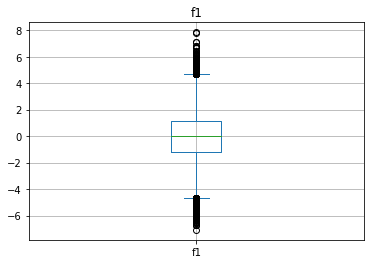

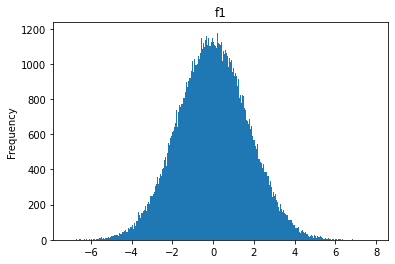

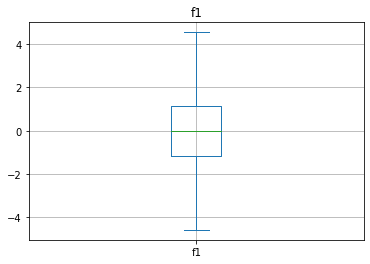

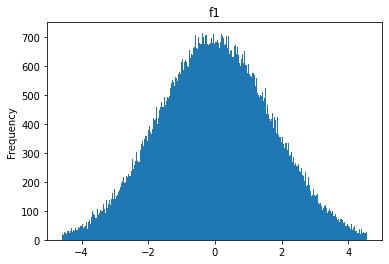

In [57]:
geo_data_third_region_ml = outlier_handling_in_feature(dataframe=geo_data_third_region_ml, 
                                                       column_name="f1",
                                                       min_range_limit=left_border,
                                                       max_range_limit=right_border)

**18. Обработаем признак `f2` в датафрейме `geo_data_third_region_ml`.**

In [58]:
# вычислим границы данных
left_border, right_border = left_right_extreme_data_boundary(geo_data_third_region_ml['f2'])

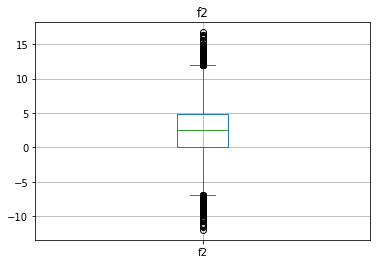

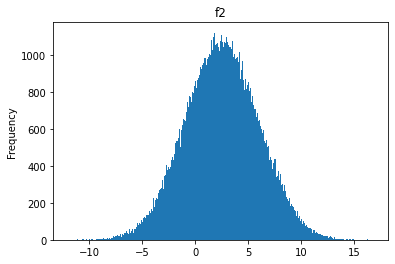

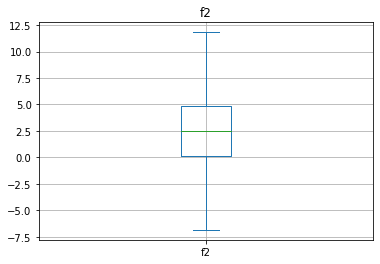

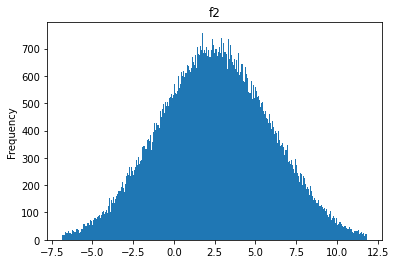

In [59]:
geo_data_third_region_ml = outlier_handling_in_feature(dataframe=geo_data_third_region_ml, 
                                                       column_name="f2",
                                                       min_range_limit=left_border,
                                                       max_range_limit=right_border)

**19. Проверим какая доля исходных датасетов осталась после фильтрации.**

In [60]:
# рассчитаем размер доли исходного датасета 'geo_data_first_region_ml', которая осталась после фильтрации,
# в процентах
(geo_data_first_region_ml.shape[0] / geo_data_first_region_source_size) * 100

99.406

In [61]:
# рассчитаем размер доли исходного датасета 'geo_data_second_region_ml', которая осталась после фильтрации,
# в процентах
(geo_data_second_region_ml.shape[0] / geo_data_second_region_source_size) * 100

99.318

In [62]:
# рассчитаем размер доли исходного датасета 'geo_data_third_region_ml', которая осталась после фильтрации,
# в процентах
(geo_data_third_region_ml.shape[0] / geo_data_third_region_source_size) * 100

97.65700000000001

Размер доли исходных датасетов, которая осталась после фильтрации: 

* `geo_data_first_region_ml` - **`99.406`**;
* `geo_data_second_region_ml` - **`99.318%`**;
* `geo_data_third_region_ml` - **`97.657%`**.

**20. Создадим отдельные датафреймы с признаками и целевым признаком.**

Разделим исходные данные на обучающую и валидационную выборки, для каждого датафрейма.

In [63]:
# функция для разделения датафрейма на два, на признаками и целевой признак
def splitting_into_features_and_target(dataframe, target_feature_name):
    return dataframe.drop([target_feature_name], axis=1), dataframe[target_feature_name]

In [64]:
geo_data_first_region_features, geo_data_first_region_target =\
    splitting_into_features_and_target(geo_data_first_region_ml, 'product')

In [65]:
geo_data_second_region_features, geo_data_second_region_target =\
    splitting_into_features_and_target(geo_data_second_region_ml, 'product')

In [66]:
geo_data_third_region_features, geo_data_third_region_target =\
    splitting_into_features_and_target(geo_data_third_region_ml, 'product')

**21. Разделим исходные данные от трёх исходных датафреймов, на две выборки: обучающую и валидационную.**

Применим метод кросс-валидации: "Hold-out".

In [67]:
def splitting_into_train_valid(features, target, train_size, random_state):
    return train_test_split(features, target, train_size=train_size, random_state=random_state)

In [68]:
# создадим переменную 'random_state' для фиксации псевдослучайности для алгоритма обучения
# и других алгоритмов в нашем проекте
random_state = 753

In [69]:
# разделим набор данных на обучающую выборку (75%) и валидационную (25%)
# для этого мы установим параметр 'train_size' = 0.75
(geo_data_first_region_features_train,
 geo_data_first_region_features_valid,
 geo_data_first_region_target_train,
 geo_data_first_region_target_valid) =\
    train_test_split(geo_data_first_region_features, 
                     geo_data_first_region_target, 
                     train_size=0.75,
                     random_state=random_state)

In [70]:
# разделим набор данных на обучающую выборку (75%) и валидационную (25%)
# для этого мы установим параметр 'train_size' = 0.75
(geo_data_second_region_features_train,
 geo_data_second_region_features_valid,
 geo_data_second_region_target_train,
 geo_data_second_region_target_valid) =\
    train_test_split(geo_data_second_region_features, 
                     geo_data_second_region_target, 
                     train_size=0.75,
                     random_state=random_state)

In [71]:
# разделим набор данных на обучающую выборку (75%) и валидационную (25%)
# для этого мы установим параметр 'train_size' = 0.75
(geo_data_third_region_features_train,
 geo_data_third_region_features_valid,
 geo_data_third_region_target_train,
 geo_data_third_region_target_valid) =\
    train_test_split(geo_data_third_region_features, 
                     geo_data_third_region_target, 
                     train_size=0.75,
                     random_state=random_state)

**`geo_data_first_region_ml`**

In [72]:
# выведем размер полученной обучающей выборки признаков для 'geo_data_first_region_ml'
geo_data_first_region_features_train.shape

(74554, 3)

In [73]:
# выведем размер полученной обучающей выборки целевого признака для 'geo_data_first_region_ml'
geo_data_first_region_target_train.shape

(74554,)

In [74]:
# выведем размер полученной валидационной выборки признаков для 'geo_data_first_region_ml'
geo_data_first_region_features_valid.shape

(24852, 3)

In [75]:
# выведем размер полученной валидационной выборки целевого признака для 'geo_data_first_region_ml'
geo_data_first_region_target_valid.shape

(24852,)

**`geo_data_second_region_ml`**

In [76]:
# выведем размер полученной обучающей выборки признаков для 'geo_data_second_region_ml'
geo_data_second_region_features_train.shape

(74488, 3)

In [77]:
# выведем размер полученной обучающей выборки целевого признака для 'geo_data_second_region_ml'
geo_data_second_region_target_train.shape

(74488,)

In [78]:
# выведем размер полученной валидационной выборки признаков для 'geo_data_second_region_ml'
geo_data_second_region_features_valid.shape

(24830, 3)

In [79]:
# выведем размер полученной валидационной выборки целевого признака для 'geo_data_second_region_ml'
geo_data_second_region_target_valid.shape

(24830,)

**`geo_data_third_region_ml`**

In [80]:
# выведем размер полученной обучающей выборки признаков для 'geo_data_third_region_ml'
geo_data_third_region_features_train.shape

(73242, 3)

In [81]:
# выведем размер полученной обучающей выборки целевого признака для 'geo_data_third_region_ml'
geo_data_third_region_target_train.shape

(73242,)

In [82]:
# выведем размер полученной валидационной выборки признаков для 'geo_data_third_region_ml'
geo_data_third_region_features_valid.shape

(24415, 3)

In [83]:
# выведем размер полученной валидационной выборки целевого признака для 'geo_data_third_region_ml'
geo_data_third_region_target_valid.shape

(24415,)

**22. Масштабируем численные признаки.**

Масштабируем численные признаки с разным разбросом значений, методом стандартизации данных, в каждой полученой выборке множества признаков: обучающей и валидационной, для каждого датасета.

In [84]:
# определим функцию стандартизации признаков
def features_standardization(features_train, features_valid,  features_list):
    
    # создадим объект класса 'StandardScaler' и настроим объект на обучающих данных
    scaler = StandardScaler()
        
    features_train[features_list] = scaler.fit_transform(features_train[features_list])
    features_valid[features_list] = scaler.transform(features_valid[features_list])
    # масштабируем признаки
    return features_train, features_valid

In [85]:
# создадим список с признаками (стобцами), которые необходимо масштабировать
numeric = ['f0',
           'f1',
           'f2']

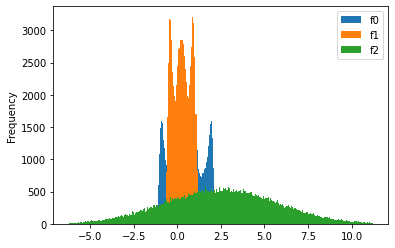

In [86]:
geo_data_first_region_features_train.plot(kind='hist', bins=300);

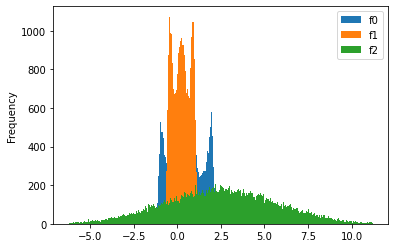

In [87]:
geo_data_first_region_features_valid.plot(kind='hist', bins=300);

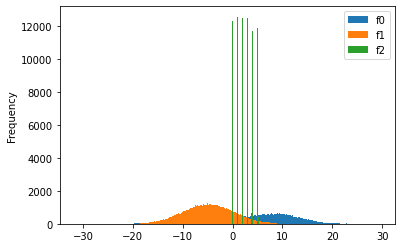

In [88]:
geo_data_second_region_features_train.plot(kind='hist', bins=300);

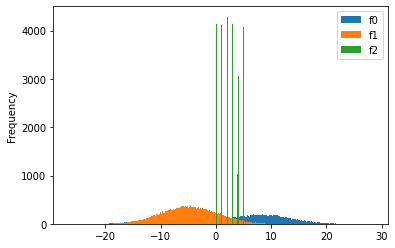

In [89]:
geo_data_second_region_features_valid.plot(kind='hist', bins=300);

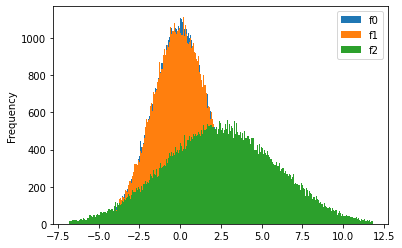

In [90]:
geo_data_third_region_features_train.plot(kind='hist', bins=300);

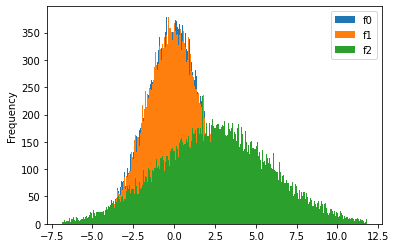

In [91]:
geo_data_third_region_features_valid.plot(kind='hist', bins=300);

In [92]:
#  масштабируем признаки для 'geo_data_first_region_ml'
geo_data_first_region_features_train, geo_data_first_region_features_valid =\
    features_standardization(geo_data_first_region_features_train,
                             geo_data_first_region_features_valid,
                             numeric)

In [93]:
#  масштабируем признаки для 'geo_data_second_region_ml'
geo_data_second_region_features_train, geo_data_second_region_features_valid =\
    features_standardization(geo_data_second_region_features_train,
                             geo_data_second_region_features_valid,
                             numeric)

In [94]:
#  масштабируем признаки для 'geo_data_third_region_ml'
geo_data_third_region_features_train, geo_data_third_region_features_valid =\
    features_standardization(geo_data_third_region_features_train,
                             geo_data_third_region_features_valid,
                             numeric)

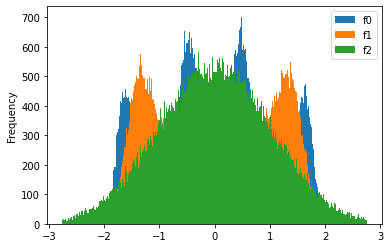

In [95]:
geo_data_first_region_features_train.plot(kind='hist', bins=300);

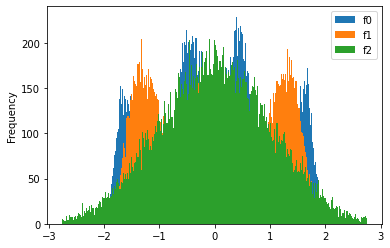

In [96]:
geo_data_first_region_features_valid.plot(kind='hist', bins=300);

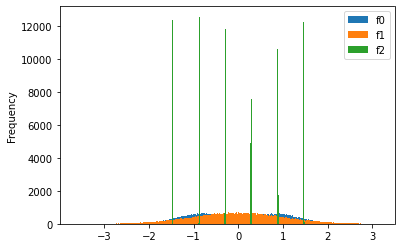

In [97]:
geo_data_second_region_features_train.plot(kind='hist', bins=300);

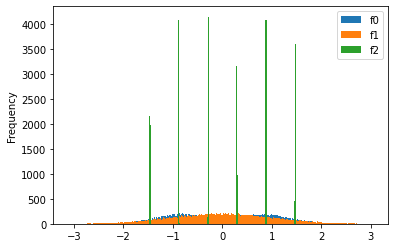

In [98]:
geo_data_second_region_features_valid.plot(kind='hist', bins=300);

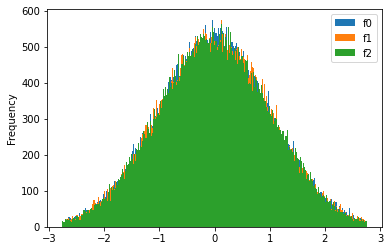

In [99]:
geo_data_third_region_features_train.plot(kind='hist', bins=300);

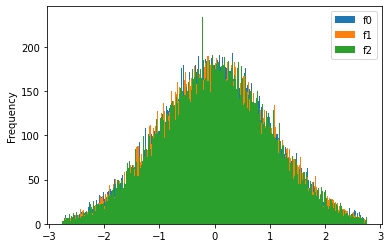

In [100]:
geo_data_third_region_features_valid.plot(kind='hist', bins=300);

**Выводы**

1. Мы создали:
   - новые датафреймы для обучения модели (ml - machine learning), посредством удаления избыточных признаков из множества признаков;
   - глобальную переменную `random_state`, в которой зафиксировали выбранную нами псевдослучайность, для дальнейшего использования на всех этапах исследования;
   - отдельные датафреймы, содержащие признаки и целевой признак для каждой выборки: обучающей и валидационной, для всех трех исходных датасетов.
 
2. Обнаружили и удалили выбросы в признаках (столбцах): `f2` датафрема `geo_data_first_region_ml`; `f1` датафрейма `geo_data_second_region_ml`; `f0`, `f1` и `f2` датафрейма `geo_data_third_region_ml`.
3. Масштабировали признаки для каждой выборки множества признаков: обучающей и валидационной, для всех трех датафреймов.

## Исследование модели

Для задачи регрессии мы рассмотрим одну популярную модель: линейная регрессия. Остальные — недостаточно предсказуемые.

In [101]:
# функция создания и обучения модели "линейной регрессии",
# получения предсказаний и вычисления метрик качеств модели 
def linear_regression(features_train,
                      target_train,
                      features_valid,
                      target_valid,
                      n_jobs=-1):
    
    # создадим модель 
    lr_model = LinearRegression(n_jobs=n_jobs)

    # обучим модель на тренировочной выборке
    lr_model.fit(features_train, target_train)

    # получим предсказания модели на валидационной выборке
    predictions_valid = lr_model.predict(features_valid)
    
    # вычислим метрику mse
    mse = mean_squared_error(target_valid, predictions_valid)

    # вычислим метрику rmse
    rmse = mse ** 0.5
    
    # вычислим метрику mae
    mae = mean_absolute_error(target_valid, predictions_valid)
    
    # вычислим метрику r2
    r2 = r2_score(target_valid, predictions_valid)
    
    # вычислим метрику mape
    mape = mean_absolute_percentage_error(target_valid, predictions_valid)

    print("Метрики модели:")
    print("\tRMSE:", rmse)
    print()
    print("\tДополнительные метрики:")
    print("\tMAE:", mae)
    print("\tR2:", r2)
    print("\tMAPE:", mape)
    print()
    
    return pd.Series(predictions_valid, index=target_valid.index)

In [102]:
def model_adequancy_mse(target_train,
                        target_valid):
    
    # получим предсказания константной модели 
    predictions_valid = pd.Series(target_train.mean(), index=target_valid.index)
    
    # вычислим метрику mse
    mse = mean_squared_error(target_valid, predictions_valid)

    # вычислим метрику rmse
    rmse = mse ** 0.5
    
    # вычислим метрику r2
    r2 = r2_score(target_valid, predictions_valid)
    
    # вычислим метрику mape
    mape = mean_absolute_percentage_error(target_valid, predictions_valid)
    
    print("Метрики константного предсказания:")
    print("\tRMSE:", rmse)
    print()
    print("\tДополнительные метрики:")
    print("\tR2:", r2)
    print("\tMAPE:", mape)
    print()

In [103]:
def model_adequancy_mae(target_train,
                        target_valid):
    
    # получим предсказания константной модели 
    predictions_valid = pd.Series(target_train.median(), index=target_valid.index)
    
    # вычислим метрику mae
    mae = mean_absolute_error(target_valid, predictions_valid)
    
    # вычислим метрику r2
    r2 = r2_score(target_valid, predictions_valid)
    
    # вычислим метрику mape
    mape = mean_absolute_percentage_error(target_valid, predictions_valid)

    print("Метрики константного предсказания:")
    print("\tMAE:", mae)
    print()
    print("\tДополнительные метрики:")
    print("\tR2:", r2)
    print("\tMAPE:", mape)
    print()

In [104]:
# функция для изучения модели (создание, обучение, предсказание, вычисление метрик качества,
# построение константной модели, проверка на адекватность)
def model_research(features_train,
                   target_train,
                   features_valid,
                   target_valid):
    

    predictions_valid =linear_regression(features_train,
                                         target_train,
                                         features_valid,
                                         target_valid)
    
    print("\nПроверка модели на адекватность (метрика  MSE (RMSE)).")
    model_adequancy_mse(target_train,
                        target_valid)
    
    print("\nПроверка модели на адекватность (метрика MAE).")
    model_adequancy_mae(target_train,
                        target_valid)
    
    return predictions_valid

**23. Исследуем модель на основе "линейной регрессии".**

**Первый регион (`geo_data_first_region_ml`).**

In [105]:
geo_data_first_region_predictions_valid = model_research(geo_data_first_region_features_train,
                                                         geo_data_first_region_target_train,
                                                         geo_data_first_region_features_valid,
                                                         geo_data_first_region_target_valid)

print("\nCредний запас предсказанного моделью сырья в регионе:", geo_data_first_region_predictions_valid.mean())
print("Cредний запас сырья в регионе (по данным из валидационной выборки):", 
      geo_data_first_region_target_valid.mean())

Метрики модели:
	RMSE: 37.62268856920617

	Дополнительные метрики:
	MAE: 30.98739105504109
	R2: 0.2752404162341938
	MAPE: 1.7837183309155193


Проверка модели на адекватность (метрика  MSE (RMSE)).
Метрики константного предсказания:
	RMSE: 44.194708244094166

	Дополнительные метрики:
	R2: -8.025775311448768e-05
	MAPE: 2.6096683582831774


Проверка модели на адекватность (метрика MAE).
Метрики константного предсказания:
	MAE: 37.62577203667528

	Дополнительные метрики:
	R2: -0.000816210254362959
	MAPE: 2.585241931257222


Cредний запас предсказанного моделью сырья в регионе: 92.49529021837567
Cредний запас сырья в регионе (по данным из валидационной выборки): 92.79360538286247


**Второй регион (`geo_data_second_region_ml`).**

In [106]:
geo_data_second_region_predictions_valid = model_research(geo_data_second_region_features_train,
                                                          geo_data_second_region_target_train,
                                                          geo_data_second_region_features_valid,
                                                          geo_data_second_region_target_valid)

print("\nCредний запас предсказанного моделью сырья в регионе:", geo_data_second_region_predictions_valid.mean())
print("Cредний запас сырья в регионе (по данным из валидационной выборки):", 
      geo_data_second_region_target_valid.mean())

Метрики модели:
	RMSE: 0.8901113771457171

	Дополнительные метрики:
	MAE: 0.7167352848614972
	R2: 0.9996234488075149
	MAPE: 260386514653148.75


Проверка модели на адекватность (метрика  MSE (RMSE)).
Метрики константного предсказания:
	RMSE: 45.8706513985335

	Дополнительные метрики:
	R2: -1.1830927594269625e-05
	MAPE: 2.5162456047907564e+16


Проверка модели на адекватность (метрика MAE).
Метрики константного предсказания:
	MAE: 40.08724275061521

	Дополнительные метрики:
	R2: -0.06400859009349813
	MAPE: 2.0863389357178224e+16


Cредний запас предсказанного моделью сырья в регионе: 68.69376708598895
Cредний запас сырья в регионе (по данным из валидационной выборки): 68.69079364085894


**Третий регион (`geo_data_third_region_ml`).**

In [107]:
geo_data_third_region_predictions_valid = model_research(geo_data_third_region_features_train,
                                                         geo_data_third_region_target_train,
                                                         geo_data_third_region_features_valid,
                                                         geo_data_third_region_target_valid)

print("\nCредний запас предсказанного моделью сырья в регионе:", geo_data_third_region_predictions_valid.mean())
print("Cредний запас сырья в регионе (по данным из валидационной выборки):", 
      geo_data_third_region_target_valid.mean())

Метрики модели:
	RMSE: 39.944501797175946

	Дополнительные метрики:
	MAE: 32.69739846704977
	R2: 0.19789873433929173
	MAPE: 10440322062339.637


Проверка модели на адекватность (метрика  MSE (RMSE)).
Метрики константного предсказания:
	RMSE: 44.604872667965594

	Дополнительные метрики:
	R2: -0.0001837443362862068
	MAPE: 17501667690744.584


Проверка модели на адекватность (метрика MAE).
Метрики константного предсказания:
	MAE: 37.62377288514224

	Дополнительные метрики:
	R2: -0.00016152190573626157
	MAPE: 17494706713813.76


Cредний запас предсказанного моделью сырья в регионе: 95.00538302641708
Cредний запас сырья в регионе (по данным из валидационной выборки): 94.27580003646668


**Выводы**

 - Лучшей регион, по метрикам качества задачи регрессии (кроме `MAPE`), является второй. Минимальная `RMSE` (**0.8901113771457171**) и `MAE` (**0.7167352848614972**), и максимальное `R2` (**0.9996234488075149**) из всех моделей. Но по среднему запасу предсказанного моделью сырья в регионе (**95.00538302641708**), который является более приоритетной метрикой бизнеса, является третий регион. Но по среднему запасу предсказанного моделью сырья в регионе (**68.69079364085894**), он на последнем месте.
 
 

 - По метрике бизнеса `средний запас предсказанного моделью сырья в регионе` (**95.00538302641708**), лучшим регионом, по прогнозу модели, где добыча принесет максимальную прибыль -  третий регион.
 
 

 - Все три модели проверены на адекватность, с помощью константных предсказаний по метрикам: MSE (RMSE) и MAE. Они полностью адекватны, что подтверждают значения метрик полученных из предсказаний моделей и соответствующих константных предсказаний.

## Подготовка к расчёту прибыли

**24. Создадим глобальные переменные, с ключевыми значениями, для расчетов.**

In [108]:
# максимальное число исследуемых скважин
max_wells_number = 500

# число лучших скважин, по количеству запасов нефти, которые отбираем для разработки 
number_best_wells = 200

# бюджет на разработку скважин в одном регионе (в рублях)
budget_for_well_development_in_region = 10000000000


# доход с одного барреля нефти  450 рублей (цена в рублях)
# доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём в данных указан в тысячах баррелей
thousand_oil_barrels_price = 450000


# после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.
losion_probability_lower = 0.025

**25. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.**

In [109]:
enough_raw_material = budget_for_well_development_in_region / (thousand_oil_barrels_price * number_best_wells)
enough_raw_material

111.11111111111111

Требуется минимум **`111.11111111111111`** тыс. баррелей нефти, в каждой из двухсот скважин, для безубыточной разработки одной новой скважины.

**26. Сравним полученный объём сырья со средним запасом в каждом регионе.**

In [110]:
print("Cредний запас сырья в первом регионе:", geo_data_first_region_ml['product'].mean())

Cредний запас сырья в первом регионе: 92.49667496223657


In [111]:
print("Cредний запас сырья во втором регионе:", geo_data_second_region_ml['product'].mean())

Cредний запас сырья во втором регионе: 68.80912506323762


In [112]:
print("Cредний запас сырья в третьем регионе:", geo_data_third_region_ml['product'].mean())

Cредний запас сырья в третьем регионе: 94.72922581245349


Средние запасы сырья в регионах, ниже минимума, который требуется для безубыточной разработки одной новой скважины. 

**27. Посмотрим, какая доля скважин, в каждом регионе, с требуемым объемом сырья.**

По имеющимся данным, проверим, какая доля скважин, в процентах, от общего количества разведанных, в каждом регионе, имеет требуемый минимум объема сырья.

In [113]:
def percentage_share(data_frame, column_name, enough_raw_material, region_name):
    percentage_share = data_frame[data_frame[column_name] >= enough_raw_material][column_name].count() / len(data_frame)
    print(f"{region_name}: {percentage_share:%}")

In [114]:
percentage_share(geo_data_first_region_ml,'product', enough_raw_material, "Первый регион")

Первый регион: 36.530994%


In [115]:
percentage_share(geo_data_second_region_ml,'product', enough_raw_material, "Второй регион")

Второй регион: 16.516644%


In [116]:
percentage_share(geo_data_third_region_ml,'product', enough_raw_material, "Третий регион")

Третий регион: 37.939933%


**Выводы**

1. Минимум `111.11111111111111` тысяч баррелей нефти требуется для безубыточной разработки одной скважины.
2. Средний запас сырья в одной сважине, в каждом регионе, меньше чем требуемый минимум от `14.7` до `38%`.
3. Доля скважин, в процентах, от общего числа разведанных, имеющих требуемый минимум сырья, в каждом регионе, составляет:  первый: `36.530994%`; второй: `16.516644%`; третий:  `37.939933%`.

## Расчёт рисков и прибыли

In [117]:
# функция для расчета прибыли по выбранным скважинам и предсказаниям модели
def revenue(target,
            probabilities,
            number_best_wells,
            thousand_oil_barrels_price,
            budget_for_well_development_in_region):
    
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:number_best_wells]
    
    return (thousand_oil_barrels_price * selected.sum()) - budget_for_well_development_in_region

In [118]:
def region_profits_and_risks(target,
                             probabilities,
                             number_best_wells=number_best_wells,
                             thousand_oil_barrels_price=thousand_oil_barrels_price,
                             budget_for_well_development_in_region=budget_for_well_development_in_region,
                             samples_number = 1000):
    
    
    # random_state для Bootstrap
    np_random_state = np.random.RandomState(753)

    values = []

    for i in range(samples_number):
        target_subsample = target.sample(n=max_wells_number, replace=True, random_state=np_random_state)
        probs_subsample = probabilities[target_subsample.index]
        
        values.append(revenue(target_subsample,
                              probs_subsample,
                              number_best_wells,
                              thousand_oil_barrels_price,
                              budget_for_well_development_in_region))
    
    
    values = pd.Series(values)
    
    print(f"Средняя прибыль: {values.mean()} рублей.")
    print("95%-й доверительный интервал:", (values.quantile(q=0.025), values.quantile(q=0.975)))
    print(f"Риск убытков: {st.percentileofscore(values, 0): } %")

**28. Найдем среднюю прибыль, 95%-й доверительный интервал и процент риска убытков.**

**Первый регион**

In [119]:
region_profits_and_risks(geo_data_first_region_target_valid,
                         geo_data_first_region_predictions_valid)

Средняя прибыль: 488755296.3249799 рублей.
95%-й доверительный интервал: (-38720571.08990783, 1010087436.1002594)
Риск убытков:  3.4000000000000004 %


**Второй регион**

In [120]:
region_profits_and_risks(geo_data_second_region_target_valid,
                         geo_data_second_region_predictions_valid)

Средняя прибыль: 488666243.6808566 рублей.
95%-й доверительный интервал: (114457928.09009352, 923615557.534635)
Риск убытков:  0.8 %


**Третий регион**

In [121]:
region_profits_and_risks(geo_data_third_region_target_valid,
                         geo_data_third_region_predictions_valid)

Средняя прибыль: 321014847.62621534 рублей.
95%-й доверительный интервал: (-225172452.7755717, 852989435.9029884)
Риск убытков:  11.5 %


**29. Оценим качество модели методом кросс-валидации.**

Оценим качество модели, на валидационной выборке второго региона.

In [122]:
cv = KFold(shuffle=True, random_state=random_state)

lr_model = LinearRegression(n_jobs=-1)

scores = cross_val_score(lr_model,
                         geo_data_second_region_features_train,
                         geo_data_second_region_target_train,
                         cv=cv,
                         scoring='r2')

print("Средняя оценка качества модели (метрика R2): %f, стандартное отклонение: %f" % (scores.mean(), scores.std()))

Средняя оценка качества модели (метрика R2): 0.999624, стандартное отклонение: 0.000002


## Итоги проекта

Условия задачи:
  1. Для построения модели использовать линейную регрессию.
  2. При разведке региона исследуют `500` точек, из которых с помощью машинного обучения выбирают `200` лучших для разработки.
  3. Бюджет на разработку скважин в регионе — `10` млрд рублей
  4. Один баррель сырья приносит `450` рублей дохода. 
  5. Отфильтровать регионы, сначала, с небольшой вероятностью убытков (меньше `2.5%`), из которых выбрать регион с наибольшей средней прибылью.
 
**По результату исследования, выбран второй регион, в котором добыча сырья принесёт наибольшую прибыль.**

Данный регион удовлетворяет пятому критерию (вероятность убытков должна быть менее `2.5%`). 

Показатели модели по второму региону и бизнес характеристики данного региона:

**Метрики качества модели:**
* `RMSE` : **0.8901113771457171**.
* `MAE` : **0.7167352848614972**;
* `R2` : **0.9996234488075149**;
* `MAPE` : **260386514653148.75**.
    
По всем метрикам, кроме `MAPE`, модель находится в большом отрыве от моделей обученных на данных по-другим регионам. По метрикам `RMSE` и `MAE` более чем в 30-ть раз.


**Характеристики региона:**
* `Средняя прибыль` : **488666243.6808566 рублей**;
* `95%-й доверительный интервал` : **(114457928.09009352, 923615557.534635)**;
* `Риск убытков` :  **0.8%*;
* `Cредний запас предсказанного моделью сырья в регионе` : **68.69376708598895**;
* `Cредний запас сырья в регионе (по данным из валидационной выборки)` : **68.69079364085894**.


Для безубыточной разработки одной новой скважины, при текущих вышеуказанных условиях, требуется минимум `111.11111111111111` тыс. баррелей нефти в каждой из двухсот скважин.

`Доля скважин, во втором регионе, c требуемым объемом сырья`: **16.516644%**


 - Выбранный регион, уступает другим двум только по характеристикам: `Cредний запас предсказанного моделью сырья в регионе`,  `Доля скважин, во втором регионе, c требуемым объемом сырья`, что закономерно, так как эти две характеристики зависимы. 

 - `Средняя прибыль` второго и первого региона, практически равны. У второго, незначительно меньше на 100 тыс. рублей. Третий регион отстает от них, по данному показателю, более чем на 100 млн. рублей.

 - Но второй регион имеет `95%-й доверительный интервал` без отрицательных значений, и `риск убытков` меньше `1%` (`0.8%`), что говорит о минимальном риске убытков в данном регионе, и в совокупности со `средней прибылью` делает второй регион лидером.



  

*Рекомендации по улучшению модели*:
   - собрать большой массив исходных данных для обучения модели;
   - обучить модель на большом массиве данных;
   - скорректировать результаты.
   
Дополнение:
    нумерация регионов в имени файлов начинается с нуля (нулевой, первый, второй). В данном исследовании, нумерация регионов начинается с единицы (первый, второй, третий).